In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [26]:
dataset = pd.read_csv('train.csv')

In [27]:
dataset.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [29]:
dataset.isnull().sum()

x    0
y    1
dtype: int64

In [30]:
dataset = dataset.dropna()

**Linear Regression**

Linear Regression h(x) = y

Cost Function J(W)= 1/2*(Σ ((w*x+b)-y)^2)

In [31]:
X_train= dataset.x
X_train.describe()

count    699.000000
mean      50.014306
std       28.954560
min        0.000000
25%       25.000000
50%       49.000000
75%       75.000000
max      100.000000
Name: x, dtype: float64

In [32]:
y= dataset.y
y.describe()

count    699.000000
mean      49.939869
std       29.109217
min       -3.839981
25%       24.929968
50%       48.973020
75%       74.929911
max      108.871618
Name: y, dtype: float64

Cost Function

# Feature Scaling

Rescaling the x values as they are in range 0<100 

In [33]:
X = np.divide(X_train,X_train.max())
X.describe()

count    699.000000
mean       0.500143
std        0.289546
min        0.000000
25%        0.250000
50%        0.490000
75%        0.750000
max        1.000000
Name: x, dtype: float64

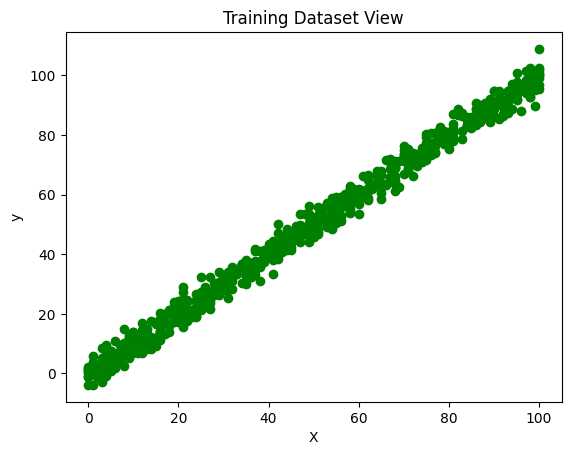

In [53]:
plt.scatter(X_train,y,color='green',label='Training Data')
plt.title("Training Dataset View")
plt.xlabel("X")
plt.ylabel("y")
#plt.legend(loc='best')
plt.show()

# Cost Function

In [35]:
def costfunction(X,y,w,b):
    h = np.multiply(X,w)
    h = np.add(h,b)
    j = np.subtract(h,y)
    j = np.power(y,2)
    j = np.divide(j,2)
    j = j.sum()
    return j

In [36]:
X.shape

(699,)

# Gradient Descent

The gradient updates the parameter w such that the cost function gets decreases.

 * The prediction of the model for that example 
    $$
    h_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (h_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (h_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator


/kaggle/input/random-linear-regression/test.csvw = w - aplha * gradient(j)
b = b - aplpha* 

In [37]:
w=0
b=0

In [38]:
def gradient(X,y,w,b):
    m = X.shape[0]
    h= np.multiply(X,w)
    h=np.add(h,b)
    dj_db = np.subtract(h,y).sum()
    dj_dw = np.multiply(np.subtract(h,y),X).sum()
    #dj_db = dj_db.sum()
    #dj_dw = dj_dw.sum()
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [39]:

def gradients(X, y, w, b):
    m = X.shape[0]

    # Normalize the input data
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    h = np.dot(X_normalized, w) + b

    dj_db = h - y
    dj_dw = np.dot(dj_db, X_normalized)

    # Calculate the mean gradients for the batch
    dj_db = dj_db.sum() / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db


In [40]:
def gradient_descent(X,y,w,b,alpha,iterations):
    # updating the parameters w and b
    timestamp=[]
    for i in range(0,iterations):
        dj_dw,dj_db = gradient(X,y,w,b)
        b = b - alpha*dj_db
        w = w - alpha*dj_dw
        if i%100==0:
            timestamp.append((i,w,b))
    return w,b,timestamp

In [41]:
#initiale values of the parameters is
print(f"w :{w}")
print(f"b :{b}")

w :0
b :0


In [42]:
#Initial Cost Value 
print("Initial Cost Function Value : ",costfunction(X,y,w,b))

Initial Cost Function Value :  1167373.6267494461


In [43]:
#Let us apply a gradient descent to the parameters with the learning rates as 0.1 and iterations be 1000
w,b,timestamp= gradient_descent(X,y,w,b,0.5,1000)
print("Time Stamp of variation of Parameters :\n")
print("Iteration\tw\tb\t")
for x in timestamp:
    print(f"{x[0]}\t{x[1]}\t{x[2]}")
print(f'\nFinal Values of parameters is \n w : {w}\n b :{b}')

Time Stamp of variation of Parameters :

Iteration	w	b	
0	16.67712292259268	24.969934585228902
100	97.445086591391	1.2960482765488113
200	99.9743676409167	-0.058389796364074195
300	100.06245934635447	-0.10556318572510433
400	100.0655274706218	-0.10720617606058756
500	100.06563432956469	-0.10726339936549104
600	100.06563805132843	-0.10726539238185803
700	100.0656381809528	-0.1072654617961208
800	100.06563818546746	-0.10726546421373521
900	100.06563818562472	-0.10726546429794699

Final Values of parameters is 
 w : 100.06563818563018
 b :-0.1072654643008673


In [44]:
def predict(x,w,b):
    y_predicted = np.multiply(x,w)
    y_predicted = np.add(y_predicted,b)
    return y_predicted

In [45]:
test_set = pd.read_csv('test.csv')
test_set.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [46]:
x_test = test_set.x.values
y_test = test_set.y.values

In [47]:
x_test = np.divide(x_test,x_test.max())

In [48]:
#Now predicted values 
y_predict= predict(x_test,w,b)

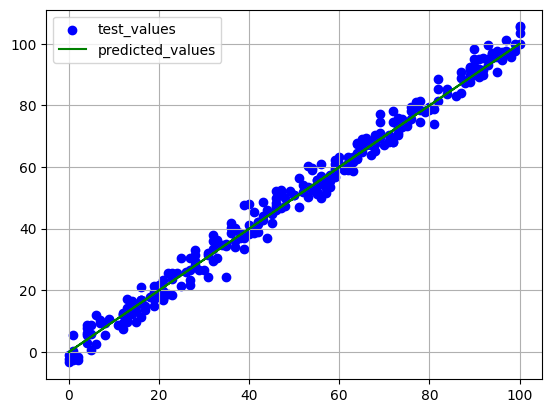

In [49]:
plt.scatter(test_set.x,y_test,color='b',label='test_values')
plt.plot(test_set.x,y_predict,color='green',label='predicted_values')
plt.grid(True)
plt.legend(loc='best')
plt.show()